In [361]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
weather_data = pd.read_csv('weatherAUS.csv')

In [10]:
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [6]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [21]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [331]:
threshold = 9
counts = 0
nan_counts = []
for index, row in weather_data.iterrows():
    count_nan = row[:].isnull().sum()
    if count_nan > threshold:
        counts+=1
        nan_counts.append(count_nan)
print(counts) 
#print(nan_counts)

2085


In [332]:
from collections import Counter
Counter(nan_counts)

Counter({11: 679,
         10: 290,
         17: 91,
         12: 757,
         16: 27,
         15: 26,
         14: 39,
         13: 106,
         18: 49,
         20: 5,
         19: 16})

In [37]:
mapping = {'Yes': 1, 'No': 0}
weather_df = weather_data.replace({'RainTomorrow': mapping,'RainToday':mapping})
weather_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,0.0,1.4,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,0


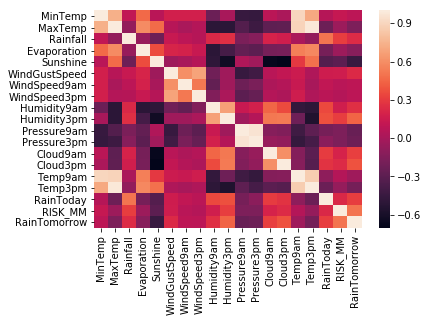

In [41]:
import seaborn as sns

# calculate the correlation matrix
corr = weather_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [43]:
corr_matrix = weather_df.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.056185,0.124743,0.083936
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.228884,-0.044208,-0.159237
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.308557,0.239032
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.187975,-0.043498,-0.119285
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.330635,-0.294973,-0.450768
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.155490,0.162923,0.234010
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.102267,0.069404,0.090995
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.080074,0.049240,0.087817
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.353358,0.172417,0.257161
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.378766,0.313183,0.446160


In [55]:
corr_matrix**2 >= 0.49

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
MaxTemp,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
Rainfall,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Evaporation,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sunshine,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
WindGustSpeed,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
WindSpeed9am,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
WindSpeed3pm,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Humidity9am,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Humidity3pm,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


scikit-learn handling NaN value: imputer 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html

In [242]:
#summarize the missing values, grouped by location
location_missing = weather_df.Location.value_counts().to_frame(name='Total')

for feature in corr_matrix.columns:
    location_missing[feature] = np.nan
    i = 0
    for city in location_counts.index:
        city_temp = weather_df[weather_df['Location']==city][feature].isnull().value_counts()
        if len(city_temp.index) == 1 and city_temp.index == False:
            location_missing.loc[city,feature] = 0
        elif len(city_temp.index) == 1 and city_temp.index == True:
            location_missing.loc[city,feature] = city_temp[True]
        else:
            location_missing.loc[city,feature] = city_temp[True]
        i = i + 1
print(location_missing)

                  Total  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Canberra           3418      5.0      3.0      16.0       1595.0    1906.0   
Sydney             3337      3.0      2.0       6.0         51.0      16.0   
Perth              3193      0.0      1.0       0.0          1.0       5.0   
Darwin             3192      1.0      0.0       0.0         54.0       3.0   
Hobart             3188      0.0      1.0       5.0          7.0      14.0   
Brisbane           3161      6.0      4.0      29.0         19.0      48.0   
Adelaide           3090      2.0      2.0      70.0       1441.0    1392.0   
Bendigo            3034      1.0      1.0       4.0       1849.0    3034.0   
Townsville         3033      2.0      0.0       6.0         89.0     417.0   
AliceSprings       3031      1.0      1.0       6.0        211.0     511.0   
MountGambier       3030      1.0      1.0       8.0        400.0     433.0   
Ballarat           3028      1.0      1.0      11.0       3028.0

In [363]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, Y_trainval, Y_test = train_test_split(weather_df.iloc[:,0:23], weather_df.RainTomorrow, random_state= 0)
# split train and validation set into training set and validation set 
X_train, X_valid, Y_train, Y_valid = train_test_split(X_trainval, Y_trainval, random_state=0)


In [277]:
weather_data.iloc[0].isnull()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm          True
Temp9am          False
Temp3pm          False
RainToday        False
RISK_MM          False
RainTomorrow     False
Name: 0, dtype: bool

In [370]:
def data_scaler(df):
    scaler=preprocessing.StandardScaler().fit(df) 
    df_scaled=scaler.transform(df)
    print("Features scaled.")
    return df_scaled

In [437]:
def split_Date(df):
    #Wildcard:
    #?:-0 or 1; +: 1 or more; *:0 or more.
    df['Year'] = df['Date'].str.extract(r'(\d\d\d\d)-') 
    df['Month'] = df['Date'].str.extract(r'-(\d\d)-')
    df['Day'] = df['Date'].str.extract(r'-\d\d-(\d\d)')
    df.drop('Date', axis=1, inplace=True)
    print('Dates splitted.')
    return df

In [350]:
def process_WindDir(df):
    
    # encoding in dummy variable
    WD9_dummies = pd.get_dummies(df['WindDir9am'], prefix='WD9')
    df = pd.concat([df, WD9_dummies], axis=1)
    
    # encoding in dummy variable
    WD3_dummies = pd.get_dummies(df['WindDir3pm'], prefix='WD3')
    df = pd.concat([df, WD3_dummies], axis=1)
    
    # encoding in dummy variable
    WGD_dummies = pd.get_dummies(df['WindGustDir'], prefix='WGD')
    df = pd.concat([df, WGD_dummies], axis=1)
    
    # removing the original variable
    df.drop('WindGustDir', axis=1, inplace=True)
    df.drop('WindDir9am', axis=1, inplace=True)
    df.drop('WindDir3pm', axis=1, inplace=True)
    
    print("WindDir processing finished.")
    return df

In [351]:
def process_Location(df):
    
    # encoding in dummy variable
    loc_dummies = pd.get_dummies(df['Location'], prefix='Loc')
    df = pd.concat([df, loc_dummies], axis=1)
    
    # removing the original variable
    df.drop('Location', axis=1, inplace=True)
    
    print("Location processing finished.")
    return df

In [439]:
df_train = process_WindDir(X_train)
df_train = process_Location(df_train)
df_train = split_Date(df_train)
#df_train= data_scaler(df_train)

WindDir processing finished.
Location processing finished.
Dates splitted.


In [440]:
print(df_train.shape)
print(X_train.shape)

(79983, 118)
(79983, 26)
